<a href="https://www.kaggle.com/code/lalit7881/gold-market-trend-prediction-using-ml-59-24?scriptVersionId=296238618" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-analysis-10-year-historical-data/gold_historical_data.csv


## Title

Gold Price Trends: 10-Year Historical Analysis

## Description

This analysis presents a comprehensive review of gold price movements over the past 10 years, highlighting long-term trends, price volatility, and key market shifts. It examines how global economic conditions, inflation, interest rates, geopolitical events, and investor sentiment have influenced gold prices over the decade.

The study helps identify growth phases, corrections, and periods of stability, offering valuable insights for investors, analysts, and policymakers. By understanding historical patterns, this analysis supports better decision-making for long-term investment strategies, risk management, and market forecasting related to gold as a safe-haven asset.

In [2]:
df = pd.read_csv("/kaggle/input/gold-price-analysis-10-year-historical-data/gold_historical_data.csv")

In [3]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-02-05,1157.800049,1157.800049,1174.800049,1146.000000,1155.599976,877
1,2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931
2,2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700
3,2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671
4,2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995


In [4]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
2505,2026-01-26,5079.700195,5079.700195,5095.600098,5052.200195,5081.500000,180
2506,2026-01-27,5079.899902,5079.899902,5079.899902,5079.899902,5079.899902,34
2507,2026-01-28,5301.600098,5301.600098,5301.600098,5301.600098,5301.600098,112054
2508,2026-01-29,5318.399902,5318.399902,5586.200195,5097.500000,5415.700195,23709
2509,2026-01-30,4713.899902,4713.899902,5440.500000,4700.000000,5376.399902,23709


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2510 non-null   object 
 1   Adj Close  2510 non-null   float64
 2   Close      2510 non-null   float64
 3   High       2510 non-null   float64
 4   Low        2510 non-null   float64
 5   Open       2510 non-null   float64
 6   Volume     2510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [6]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000
mean,1862.680556,1862.680556,1872.036176,1852.944064,1862.260478,5161.460558
std,713.045002,713.045002,719.366255,706.561716,712.946710,28443.386437
min,1127.800049,1127.800049,1132.800049,1123.900024,1126.900024,0.000000
25%,1306.224976,1306.224976,1310.325043,1301.624969,1306.224976,53.250000
50%,1767.350037,1767.350037,1777.200012,1759.900024,1768.049988,213.000000
75%,1968.975006,1968.975006,1978.375031,1960.599976,1969.325012,655.500000
max,5318.399902,5318.399902,5586.200195,5301.600098,5415.700195,386334.000000


In [7]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

In [10]:
df.shape

(2510, 7)

In [11]:
df.nunique()

Date         2510
Adj Close    2186
Close        2186
High         2186
Low          2190
Open         2180
Volume       1077
dtype: int64

In [12]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

## Data visualizations

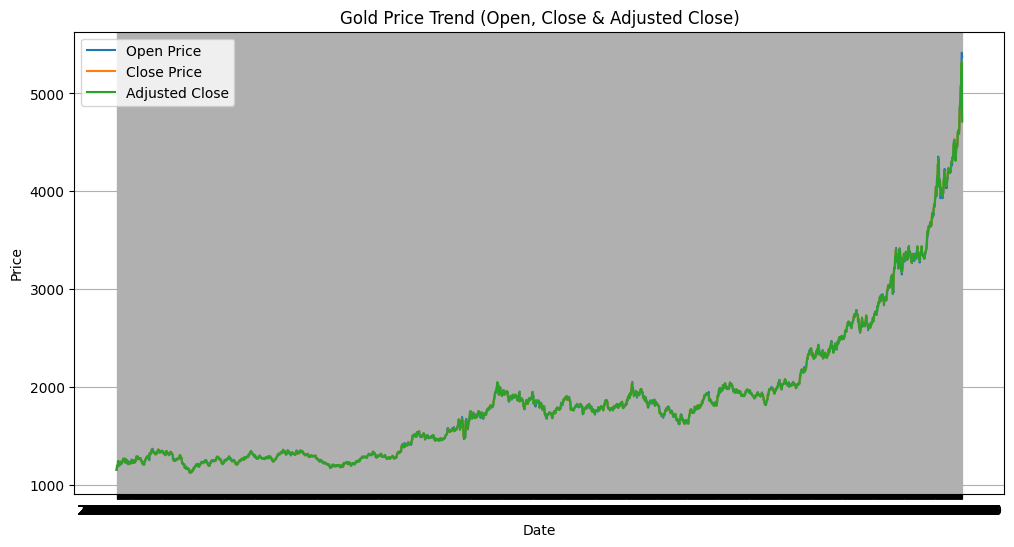

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close')

plt.title("Gold Price Trend (Open, Close & Adjusted Close)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


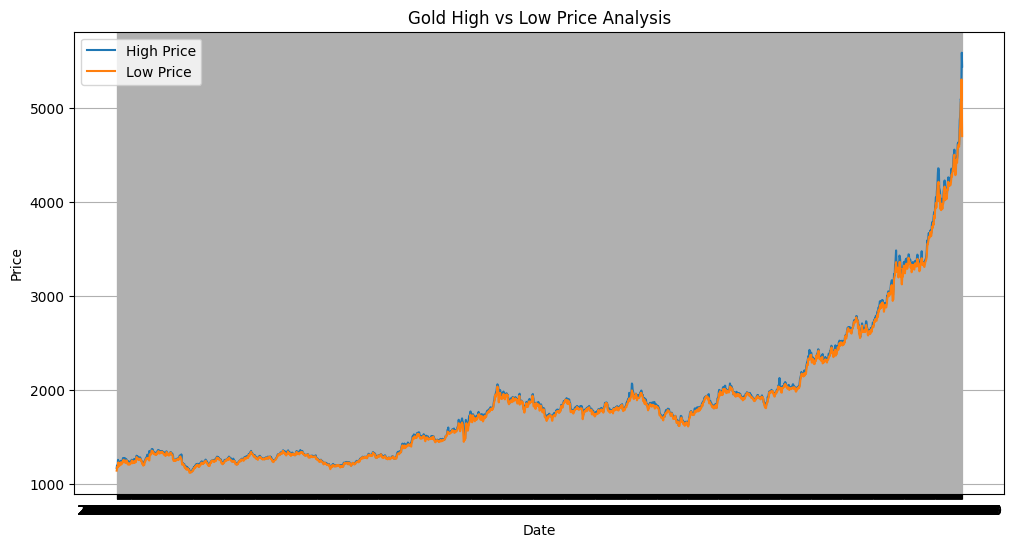

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High Price')
plt.plot(df['Date'], df['Low'], label='Low Price')

plt.title("Gold High vs Low Price Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


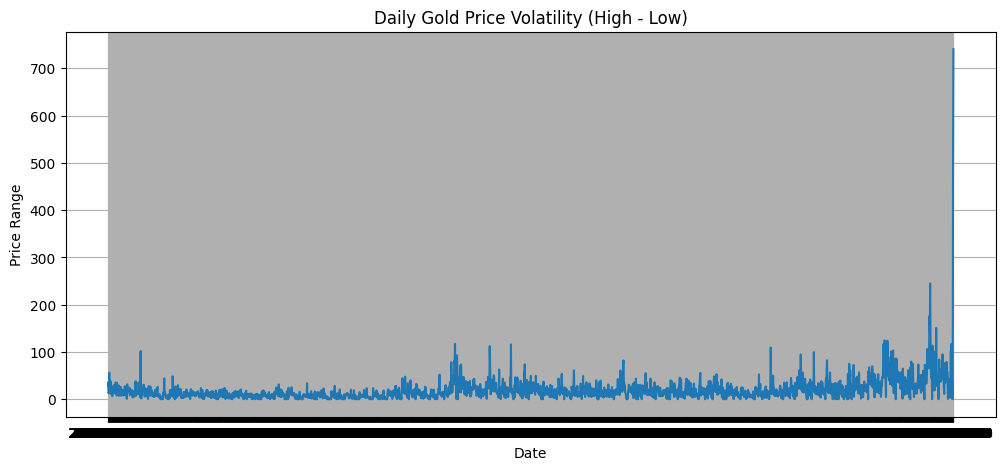

In [15]:
df['Price Range'] = df['High'] - df['Low']

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Price Range'])

plt.title("Daily Gold Price Volatility (High - Low)")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.grid(True)
plt.show()


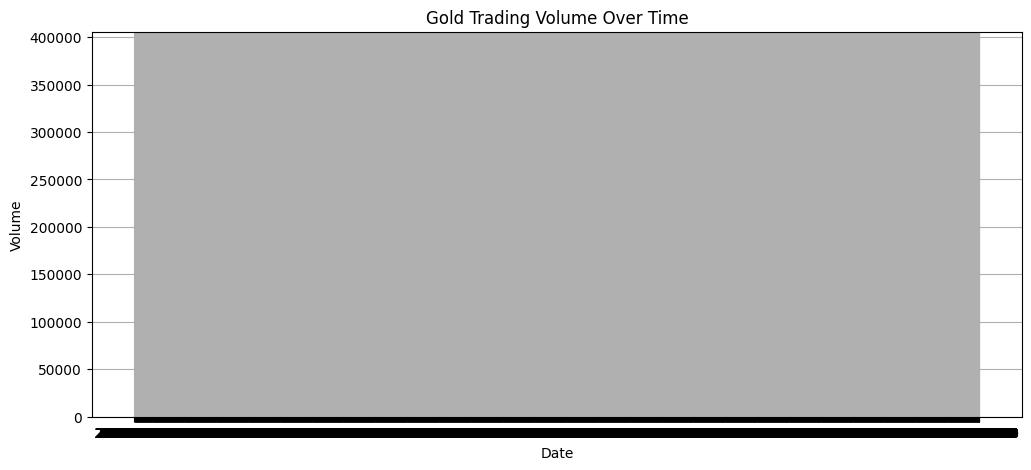

In [16]:
plt.figure(figsize=(12, 5))
plt.bar(df['Date'], df['Volume'])

plt.title("Gold Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


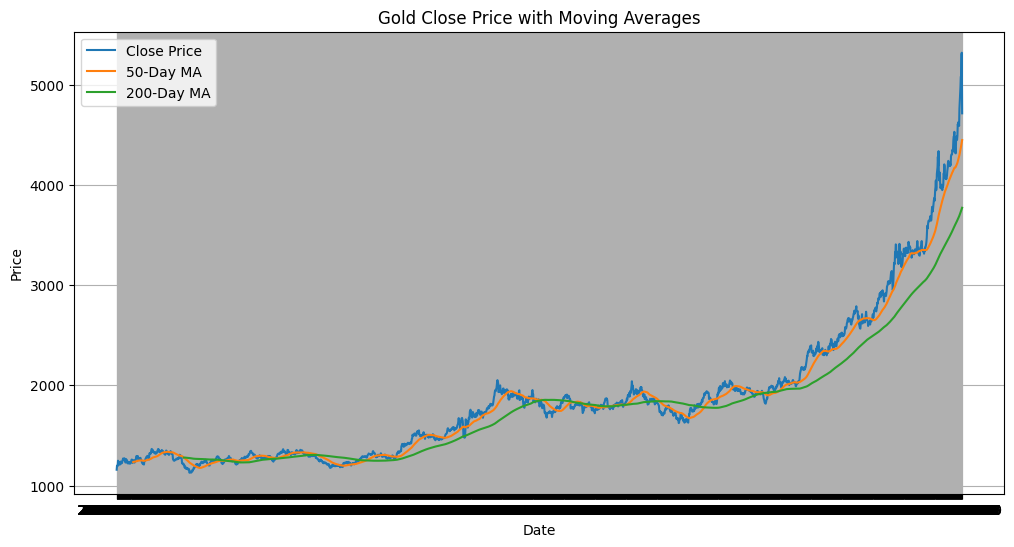

In [17]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA')

plt.title("Gold Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


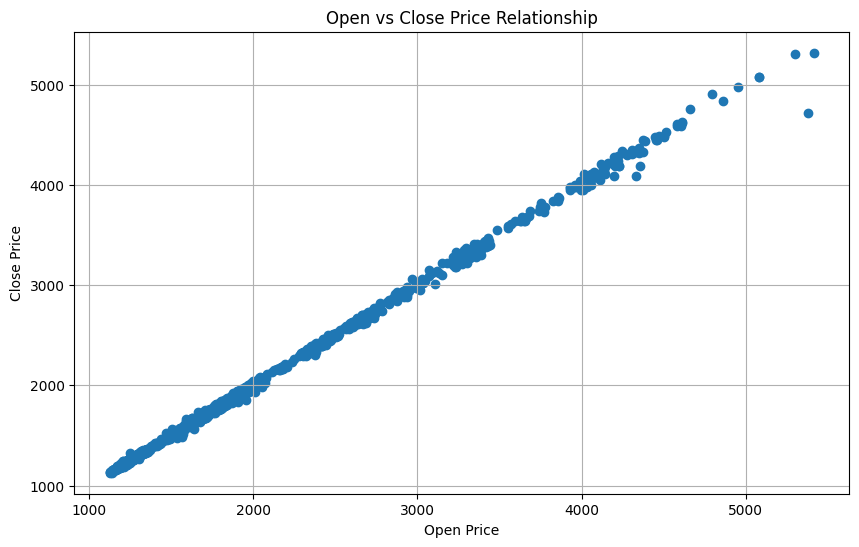

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'])

plt.title("Open vs Close Price Relationship")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


In [19]:
from datetime import datetime, timedelta

In [20]:
import yfinance as yf

In [21]:
# Gold Futures ticker
ticker = "GC=F"

# Date range (last 10 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)

print("🔍 Fetching Gold Price Data...")
df = yf.download(
    ticker,
    start=start_date.strftime('%Y-%m-%d'),
    end=end_date.strftime('%Y-%m-%d'),
    auto_adjust=False
)

print(f"✅ Records fetched: {len(df)}")


🔍 Fetching Gold Price Data...


[*********************100%***********************]  1 of 1 completed

✅ Records fetched: 2512


In [22]:
# Flatten multi-level columns
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

print("✅ Columns:", df.columns.tolist())


✅ Columns: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [23]:
print("📊 DATASET OVERVIEW")
print(df.info())

print("\n📈 STATISTICAL SUMMARY")
print(df.describe())

print("\n❌ Missing Values")
print(df.isnull().sum())


📊 DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2512 entries, 2016-02-09 to 2026-02-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2512 non-null   float64
 1   Close      2512 non-null   float64
 2   High       2512 non-null   float64
 3   Low        2512 non-null   float64
 4   Open       2512 non-null   float64
 5   Volume     2512 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.4 KB
None

📈 STATISTICAL SUMMARY
Price    Adj Close        Close         High          Low         Open  \
count  2512.000000  2512.000000  2512.000000  2512.000000  2512.000000   
mean   1867.946057  1867.946057  1877.536027  1858.016242  1867.581370   
std     722.251659   722.251659   729.456736   715.046003   722.331836   
min    1127.800049  1127.800049  1132.800049  1123.900024  1126.900024   
25%    1306.675049  1306.675049  1310.624969  1302.099976  1306.975006   
50%    1768.5

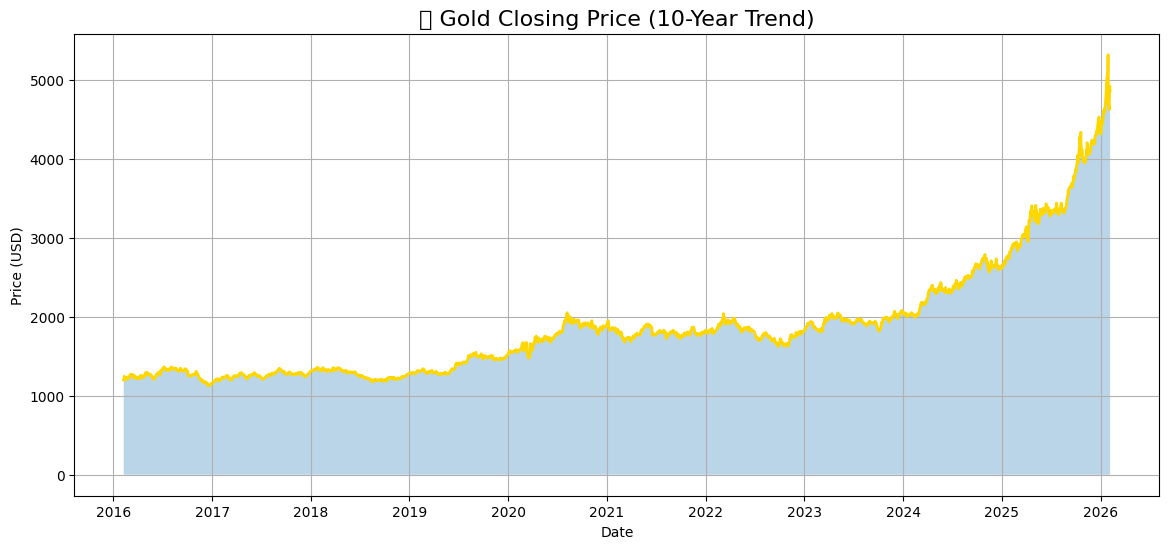

In [24]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], color='#FFD700', linewidth=2)
plt.fill_between(df.index, df['Close'], alpha=0.3)

plt.title("💰 Gold Closing Price (10-Year Trend)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

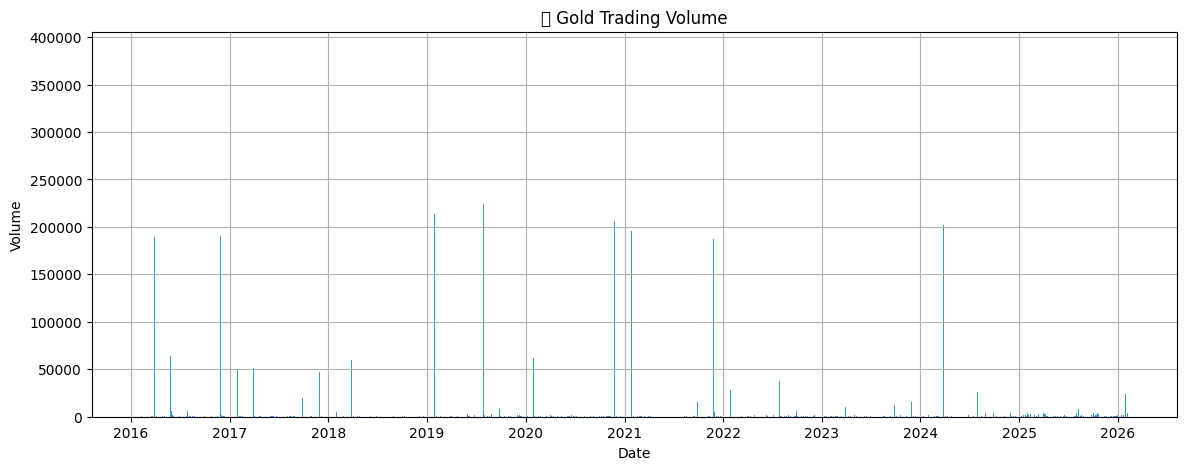

In [25]:
plt.figure(figsize=(14,5))
plt.bar(df.index, df['Volume'], color='#3498db')

plt.title("📊 Gold Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


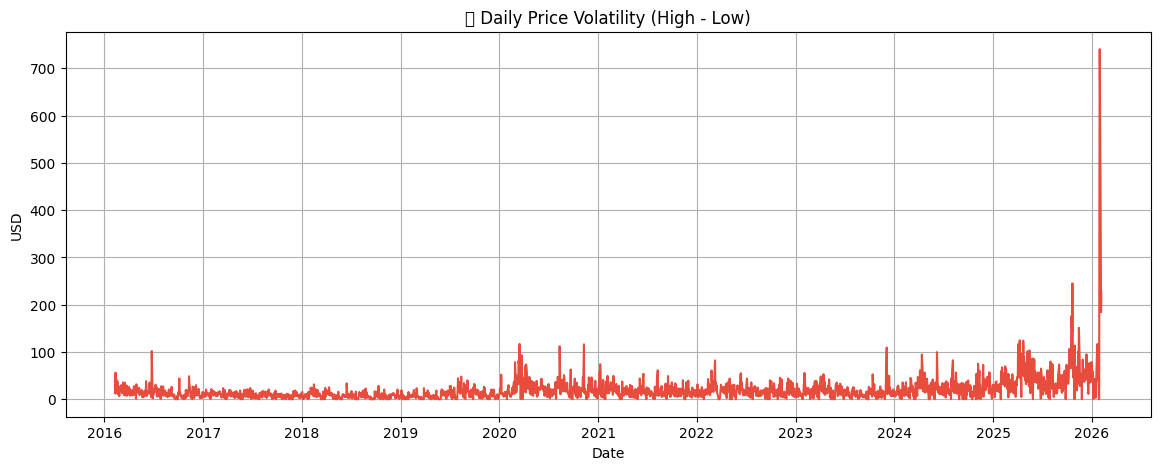

In [26]:
df['Daily_Range'] = df['High'] - df['Low']

plt.figure(figsize=(14,5))
plt.plot(df.index, df['Daily_Range'], color='#e74c3c')

plt.title("📈 Daily Price Volatility (High - Low)")
plt.xlabel("Date")
plt.ylabel("USD")
plt.grid(True)
plt.show()


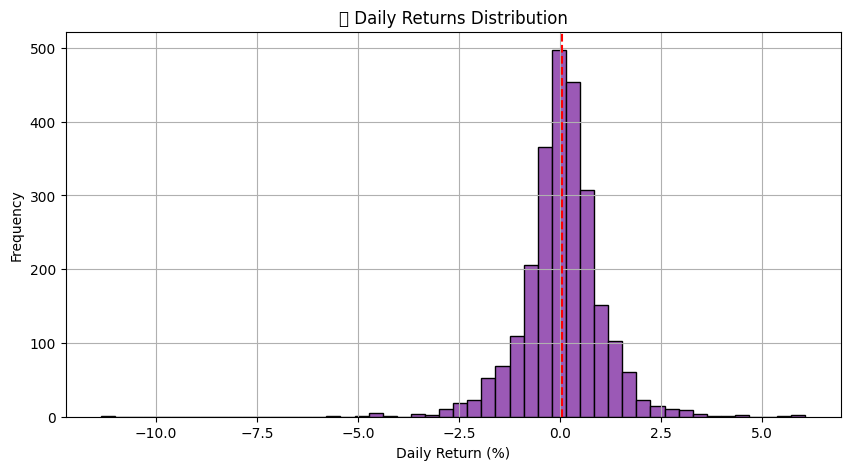

In [27]:
daily_returns = df['Close'].pct_change() * 100

plt.figure(figsize=(10,5))
plt.hist(daily_returns.dropna(), bins=50, color='#9b59b6', edgecolor='black')
plt.axvline(daily_returns.mean(), color='red', linestyle='--')

plt.title("📉 Daily Returns Distribution")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


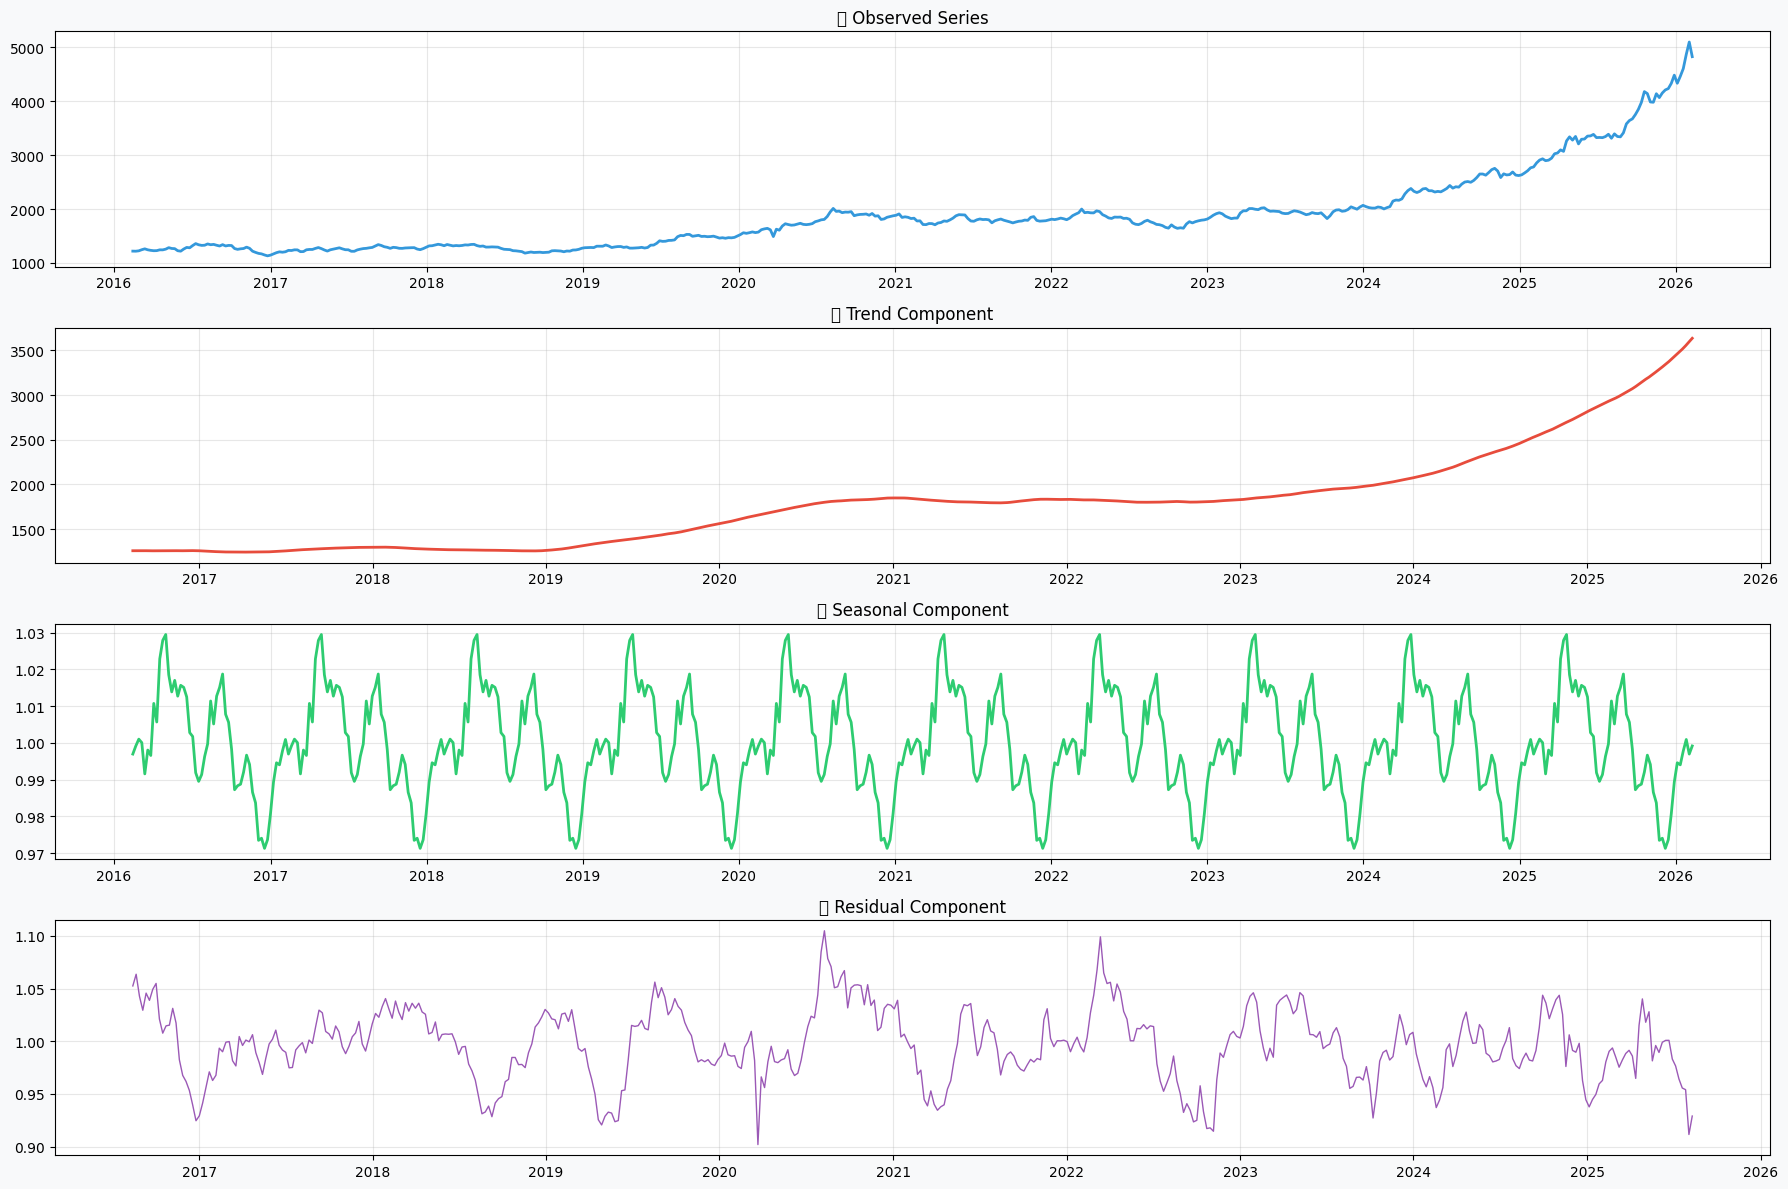

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Weekly resampling
weekly_close = df['Close'].resample('W').mean()

# Decomposition
decomposition = seasonal_decompose(
    weekly_close,
    model='multiplicative',
    period=52
)

# Plot results
fig, axes = plt.subplots(4, 1, figsize=(18, 12))
fig.patch.set_facecolor('#f8f9fa')

axes[0].plot(decomposition.observed, color='#3498db', linewidth=2)
axes[0].set_title('📈 Observed Series')

axes[1].plot(decomposition.trend, color='#e74c3c', linewidth=2)
axes[1].set_title('📊 Trend Component')

axes[2].plot(decomposition.seasonal, color='#2ecc71', linewidth=2)
axes[2].set_title('🔁 Seasonal Component')

axes[3].plot(decomposition.resid, color='#9b59b6', linewidth=1)
axes[3].set_title('📉 Residual Component')

for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('#ffffff')

plt.tight_layout()
plt.show()


In [29]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Close'])

print("ADF Statistic:", adf_test[0])
print("P-Value:", adf_test[1])

if adf_test[1] < 0.05:
    print("✅ Stationary Series")
else:
    print("⚠️ Non-Stationary Series")


ADF Statistic: 6.344153170972758
P-Value: 1.0
⚠️ Non-Stationary Series


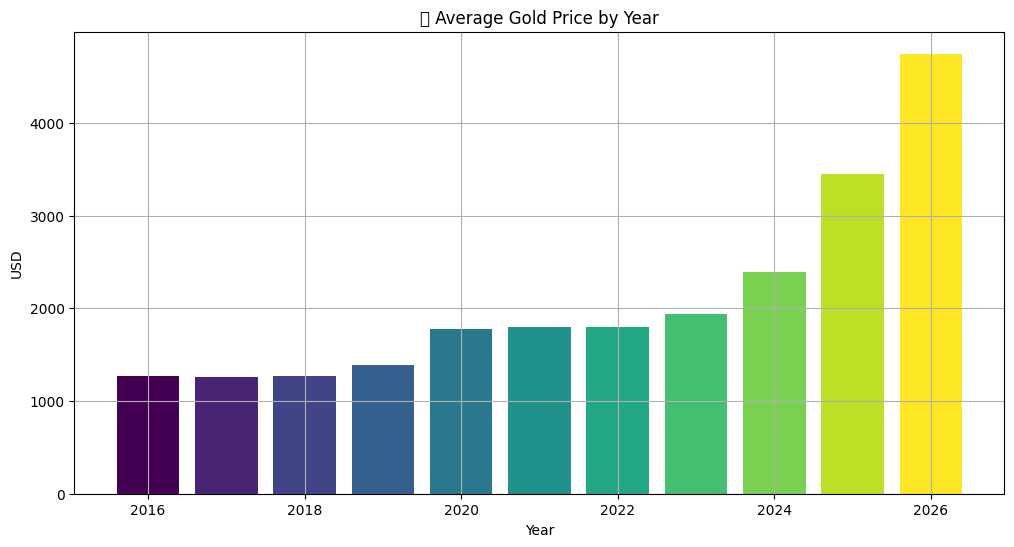

In [30]:
yearly_avg = df.groupby(df.index.year)['Close'].mean()

plt.figure(figsize=(12,6))
plt.bar(yearly_avg.index, yearly_avg.values, color=plt.cm.viridis(np.linspace(0,1,len(yearly_avg))))

plt.title("📅 Average Gold Price by Year")
plt.xlabel("Year")
plt.ylabel("USD")
plt.grid(True)
plt.show()


In [31]:
df_ml = df.copy()

df_ml['Return'] = df_ml['Close'].pct_change()
df_ml['MA_30'] = df_ml['Close'].rolling(30).mean()
df_ml['MA_60'] = df_ml['Close'].rolling(60).mean()
df_ml['Volatility_30'] = df_ml['Close'].rolling(30).std()

print("✅ Feature Engineering Completed")


✅ Feature Engineering Completed


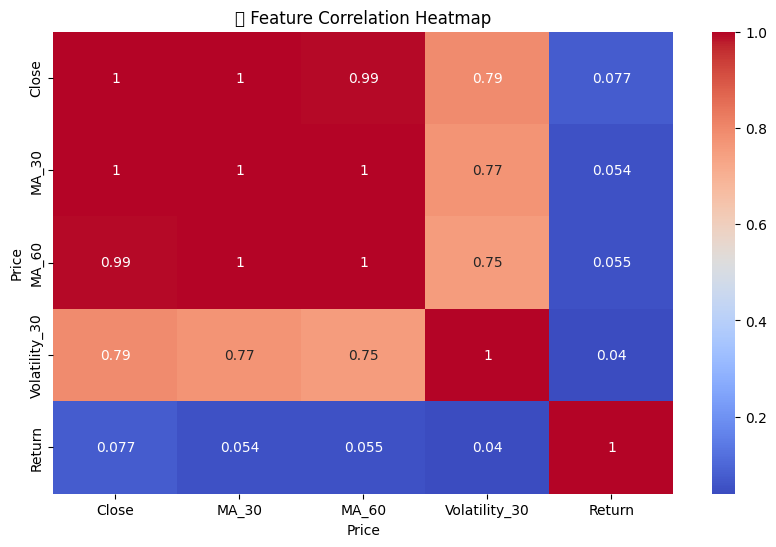

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df_ml[['Close','MA_30','MA_60','Volatility_30','Return']].corr(),
            annot=True, cmap='coolwarm')

plt.title("🔥 Feature Correlation Heatmap")
plt.show()

In [33]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Gold Price',
    line=dict(color='#FFD700')
))

fig.update_layout(
    title="📈 Interactive Gold Price Timeline",
    xaxis_rangeslider_visible=True,
    yaxis_title="USD"
)

fig.show()


## Feature engg

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [35]:
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 'Up', 'Down')

# Drop last row (NaN target)
df.dropna(inplace=True)


In [36]:
le = LabelEncoder()
df['Target_Encoded'] = le.fit_transform(df['Target'])

print(le.classes_)  # ['Down', 'Up']


['Down' 'Up']


In [37]:
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df['Target_Encoded']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=False
)


In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

accuracy_scores = {}


In [41]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    
    print(f"\n{name}")
    print("Accuracy:", round(acc * 100, 2), "%")



Logistic Regression
Accuracy: 59.24 %

Decision Tree
Accuracy: 40.36 %

Random Forest
Accuracy: 40.36 %

KNN
Accuracy: 41.95 %

SVM
Accuracy: 54.67 %

Naive Bayes
Accuracy: 44.93 %


In [42]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} - Confusion Matrix")
    print(cm)



Logistic Regression - Confusion Matrix
[[  0 205]
 [  0 298]]

Decision Tree - Confusion Matrix
[[199   6]
 [294   4]]

Random Forest - Confusion Matrix
[[201   4]
 [296   2]]

KNN - Confusion Matrix
[[200   5]
 [287  11]]

SVM - Confusion Matrix
[[ 54 151]
 [ 77 221]]

Naive Bayes - Confusion Matrix
[[142  63]
 [214  84]]


In [43]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



Logistic Regression - Classification Report
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       205
          Up       0.59      1.00      0.74       298

    accuracy                           0.59       503
   macro avg       0.30      0.50      0.37       503
weighted avg       0.35      0.59      0.44       503


Decision Tree - Classification Report
              precision    recall  f1-score   support

        Down       0.40      0.97      0.57       205
          Up       0.40      0.01      0.03       298

    accuracy                           0.40       503
   macro avg       0.40      0.49      0.30       503
weighted avg       0.40      0.40      0.25       503


Random Forest - Classification Report
              precision    recall  f1-score   support

        Down       0.40      0.98      0.57       205
          Up       0.33      0.01      0.01       298

    accuracy                           0.40       503
   ma

In [44]:
accuracy_df = pd.DataFrame({
    'Model': accuracy_scores.keys(),
    'Accuracy (%)': [v * 100 for v in accuracy_scores.values()]
})

accuracy_df = accuracy_df.sort_values(by='Accuracy (%)', ascending=False)
print(accuracy_df)


                 Model  Accuracy (%)
0  Logistic Regression     59.244533
4                  SVM     54.671968
5          Naive Bayes     44.930417
3                  KNN     41.948310
1        Decision Tree     40.357853
2        Random Forest     40.357853


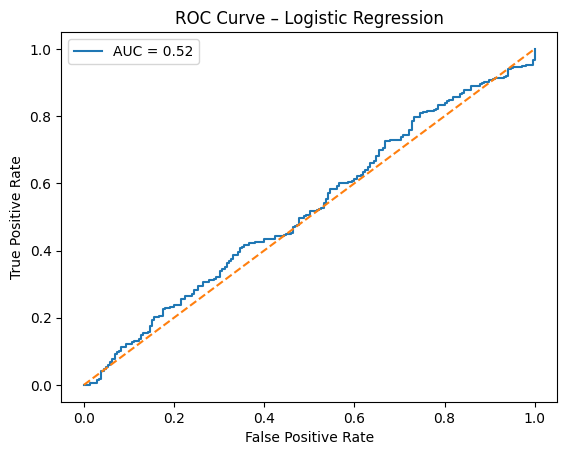

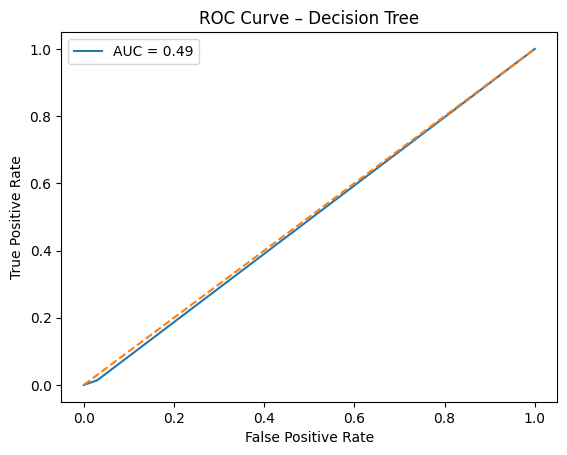

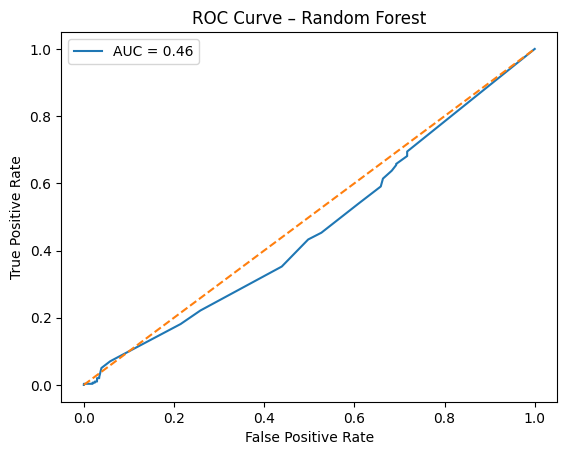

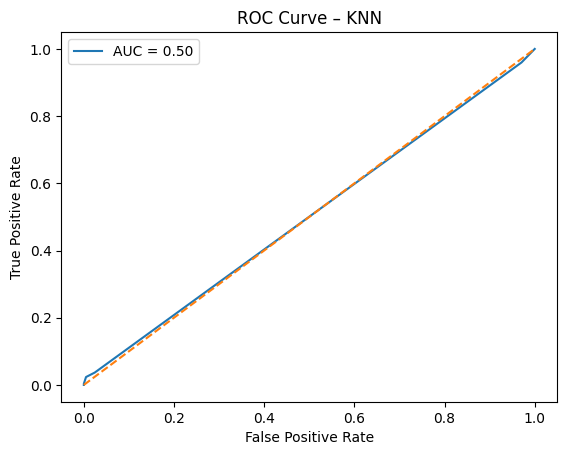

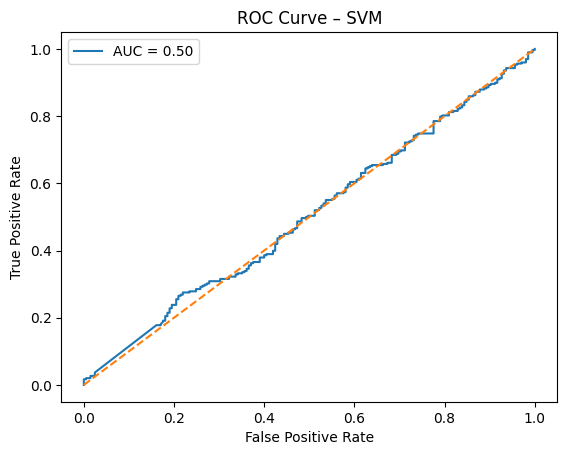

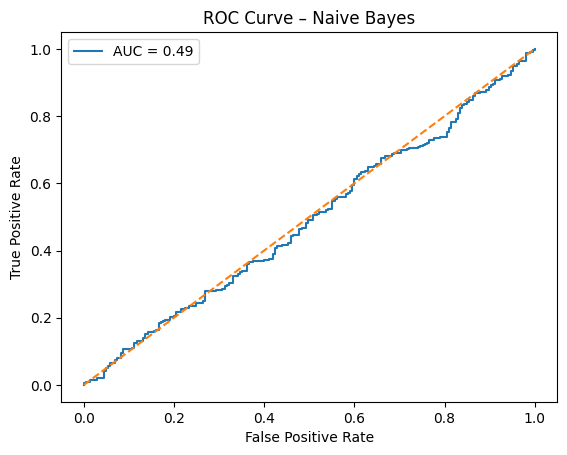

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

for name, model in models.items():

    # ---- Handle SVM separately ----
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {name}")
    plt.legend()
    plt.show()


## Thank you...pls upvote!!!!!!